# Red Wine Quality Prediction Project

## Project prepaired by VISHAL

In [1]:
import pandas as pd
import numpy as np

# Load the data into a pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')


In [2]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Step 1: Importing Required Libraries



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Loading and Exploring the Data



In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
print(df.head())
print(df.info())
print(df.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### Step 3: Data Preprocessing



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
240
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968 

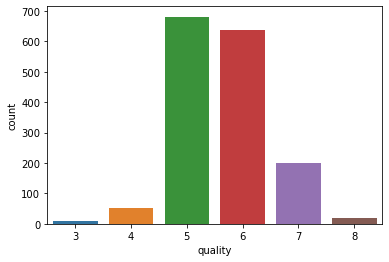

In [5]:
# check for missing values
print(df.isnull().sum())

# check for duplicates
print(df.duplicated().sum())

# visualize the target variable distribution
sns.countplot(x='quality', data=df)

# create a binary target variable based on quality score cutoff
df['good_quality'] = np.where(df['quality']>=7, 1, 0)
print(df.head())

# drop the original quality column
df.drop(['quality'], axis=1, inplace=True)

# standardize the input variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop(['good_quality'], axis=1)
y = df['good_quality']
X = scaler.fit_transform(X)

# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 4: Model Selection and Training



In [6]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# train a decision tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# train a random forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

### Step 5: Model Evaluation



In [7]:
# evaluate the logistic regression model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred_lr = lr_model.predict(X_test)
print('Logistic Regression')
print('Accuracy: ', accuracy_score(y_test, y_pred_lr))
print('Precision: ', precision_score(y_test, y_pred_lr))
print('Recall: ', recall_score(y_test, y_pred_lr))
print('F1 Score: ', f1_score(y_test, y_pred_lr))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred_lr))

Logistic Regression
Accuracy:  0.865625
Precision:  0.5909090909090909
Recall:  0.2765957446808511
F1 Score:  0.37681159420289856
ROC AUC Score:  0.6218143558569091


In [8]:
# evaluate the decision tree model
y_pred_dt = dt_model.predict(X_test)
print('Decision Tree')
print('Accuracy: ', accuracy_score(y_test, y_pred_dt))
print('Precision: ', precision_score(y_test, y_pred_dt))
print('Recall: ', recall_score(y_test, y_pred_dt))
print('F1 Score: ', f1_score(y_test, y_pred_dt))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred_dt))

Decision Tree
Accuracy:  0.878125
Precision:  0.5869565217391305
Recall:  0.574468085106383
F1 Score:  0.5806451612903226
ROC AUC Score:  0.7524355077546567


In [9]:
# evaluate the random forest model
y_pred_rf = rf_model.predict(X_test)
print('Random Forest')
print('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print('Precision: ', precision_score(y_test, y_pred_rf))
print('Recall: ', recall_score(y_test, y_pred_rf))
print('F1 Score: ', f1_score(y_test, y_pred_rf))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred_rf))

Random Forest
Accuracy:  0.9
Precision:  0.7272727272727273
Recall:  0.5106382978723404
F1 Score:  0.5999999999999999
ROC AUC Score:  0.7388356324526537
